# Графики и не только
---

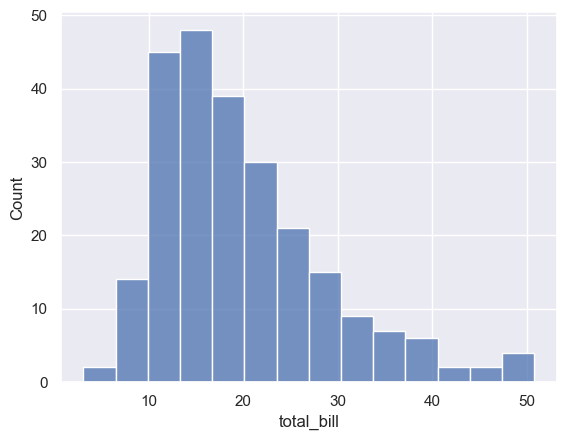

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets
import seaborn as sns

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.histplot(
    data=tips, x="total_bill"
)
plt.show()


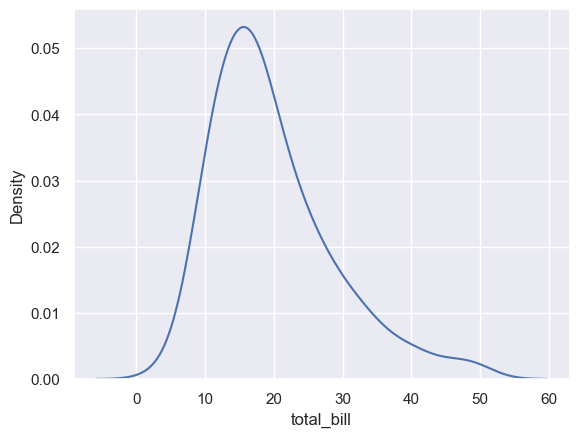

In [3]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.kdeplot(    
    data=tips, x="total_bill"
)
plt.show()

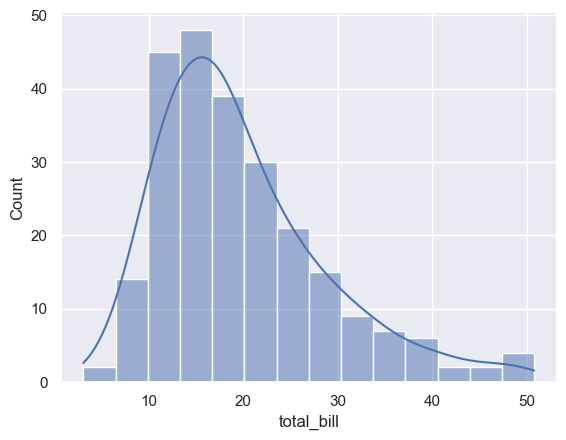

In [4]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.histplot(
    data=tips, x="total_bill", kde=True
)
plt.show()

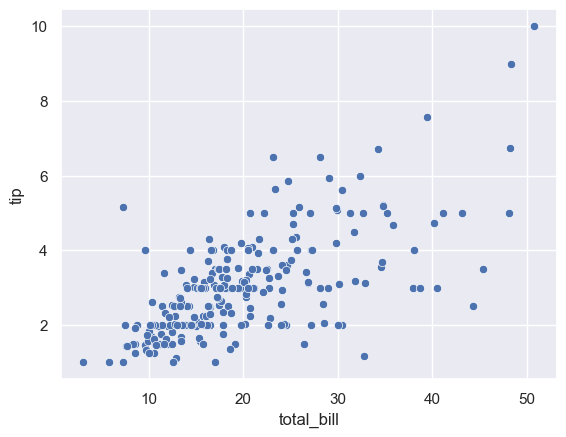

In [5]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.scatterplot(
    x="total_bill",y="tip", data=tips
)
plt.show()

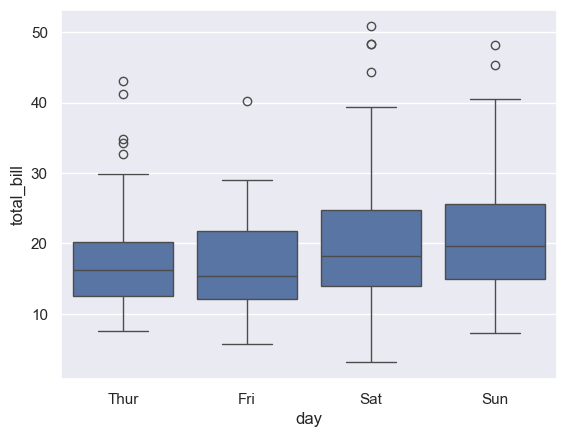

In [6]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.boxplot(
    x="day",y="total_bill", data=tips
)
plt.show()

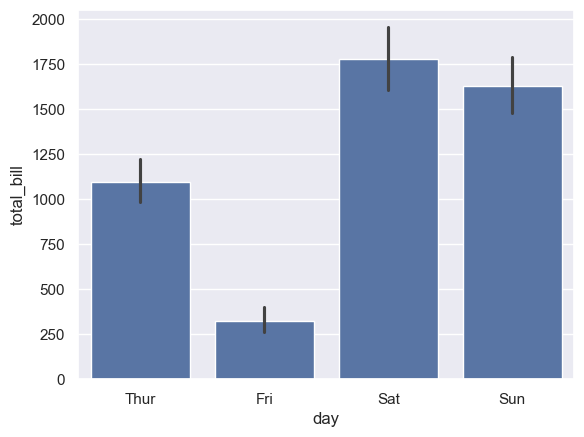

In [8]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.barplot(
    x="day",y="total_bill", data=tips, estimator=sum
)
plt.show()

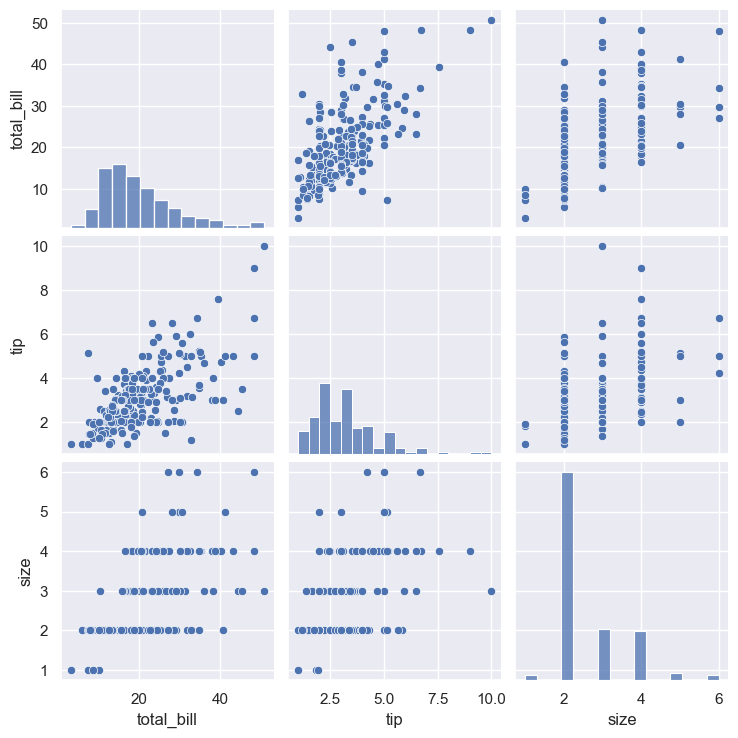

In [9]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
sns.pairplot(tips)
plt.show()

# Методы Эйлера и дифференциальные уравнения
---

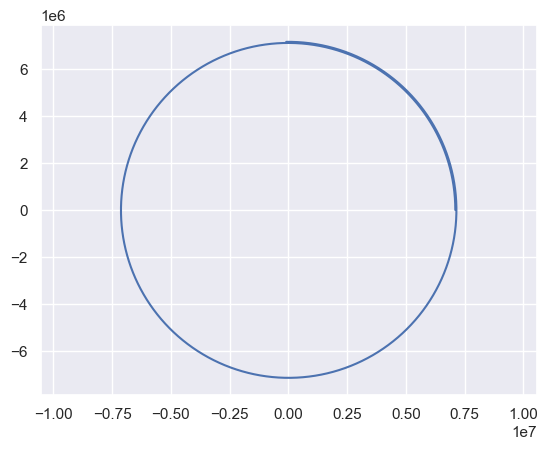

In [11]:
GRAV_PARAMETER = 3.986e14
INITIAL_TIME = 0
FINAL_TIME = 7500
STEP_TIME = 0.5

initialState = np.array([
    7100e3, 0, 0, 0, (GRAV_PARAMETER / 7100e3) ** (1 / 2), 0
])

def ballisticsFunc3d(y):
    position = np.array(y[:3])
    gravAcceleration = -GRAV_PARAMETER * position / np.linalg.norm(position) ** 3

    return np.array([y[3], y[4], y[5], gravAcceleration[0], gravAcceleration[1], gravAcceleration[2]])

numerical_time_grid = np.arange(INITIAL_TIME, FINAL_TIME, STEP_TIME)
GRID_SIZE = np.size(numerical_time_grid)
Q = np.zeros((GRID_SIZE, 6))
Q[0] = initialState

for j in range(1, GRID_SIZE):
    Q[j] = Q[j-1] + ballisticsFunc3d(Q[j-1]) * STEP_TIME

fig, ax, = plt.subplots()
ax.axis("equal")
ax.plot(Q[:, 0], Q[:, 1])
plt.show()

## Sympy

In [13]:
import sympy as sp
x = sp.Symbol("x")
f = -(1+x**2)/(1+(2-x)**2)
df = f.diff()
sp.factor(df)
sp.solve(df)

[1 - sqrt(2), 1 + sqrt(2)]

In [17]:
A, B = sp.symbols("A B")
total_area = A**3*B + 4*A**2*B**2 + 4*A*B**3
optimized_dimensions = sp.factor(total_area)

print(total_area)
optimized_dimensions

A**3*B + 4*A**2*B**2 + 4*A*B**3


A*B*(A + 2*B)**2

In [19]:
t = sp.symbols("t")
y = sp.Function("y")

equation = sp.Eq(y(t).diff(t), -2 * y(t))
solution = sp.dsolve(equation)
solution

Eq(y(t), C1*exp(-2*t))

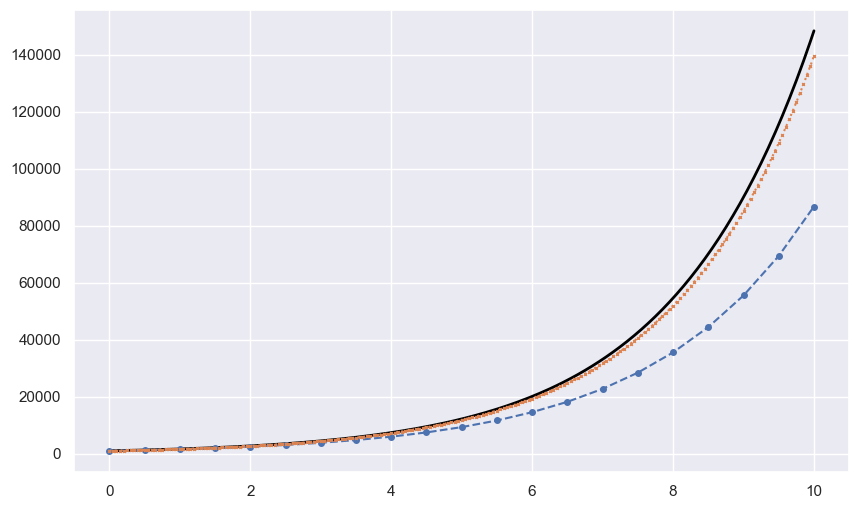

In [28]:
t, P, k = sp.symbols("t P k")
f = k * P
t0 = 0
P0 = 1000
k_val = 0.5
t_val = 10.0
t_end = 10

num_steps_large = 20
h_large = (t_end - t0) / num_steps_large
t_values_large = [t0]
P_euler_large = [P0]

for i in range(num_steps_large):
    t_n = t_values_large[-1]
    P_n = P_euler_large[-1]

    dP_dt_n = f.subs({P: P_n, k: k_val})
    P_n_plus_1 = P_n + h_large * dP_dt_n

    t_values_large.append(t_n + h_large)
    P_euler_large.append(P_n_plus_1)

num_steps_small = 200
h_small = (t_end - t0) / num_steps_small
t_values_small = [t0]
P_euler_small = [P0]

for i in range(num_steps_small):
    t_n = t_values_small[-1]
    P_n = P_euler_small[-1]

    dP_dt_n = f.subs({P: P_n, k: k_val})
    P_n_plus_1 = P_n + h_small * dP_dt_n

    t_values_small.append(t_n + h_small)
    P_euler_small.append(P_n_plus_1)

P_exact_func = P0 * sp.exp(k_val * t)
t_exact_points = [t0 + i * h_small for i in range (num_steps_small + 1)]
P_exact_values = [P_exact_func.subs(t, time_point) for time_point in t_exact_points]

plt.figure(figsize=(10,6))
plt.plot(t_exact_points, P_exact_values, color="black", linewidth=2)
plt.plot(t_values_large, P_euler_large, linestyle="--", marker="o", markersize=4)
plt.plot(t_values_small, P_euler_small, linestyle=":", marker="x", markersize=2)
plt.grid(True); plt.show()